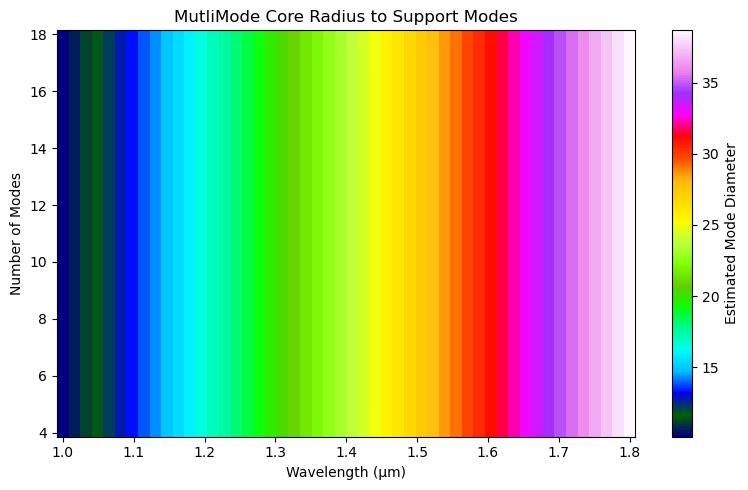

In [ ]:
from RSoftSimulation import RSoftSim
from Circuit_Properties import *
from Functions import *
from HexProperties import *

simulation_val = {
    "launch_type": LaunchType.MM,
    "monitor_type": Monitor_Prop.FIBRE_MODE_POWER,
    "comp": Monitor_comp.MAJOR,
    "launch_tilt": 0,
    "launch_mode": 0,
    "launch_mode_radial": 1,
    "num_paras": 72,
    "batch_num": 10,
    "core_to_monitor": 4,
    "metric": 'MS',
    # these bottom 2 MUST be here for mode selective behaviour
    "mode_selective": 1,
    "core_num": 7,
}

# make this a function
# specify MS core properties
if "core_num" in simulation_val and simulation_val["mode_selective"] == 1:
    ms_diam = [8.2] * simulation_val["core_num"]
    ms_delta = [fixed_params["core_delta"]] * simulation_val["core_num"]

    if len(ms_diam) != simulation_val["core_num"] or len(ms_delta) != simulation_val["core_num"]:
        raise Exception("Number of specified core properties does not math the number of modelled cores")

    for i, (diam, delta) in enumerate(zip(ms_diam, ms_delta), start = 1):
        simulation_val[f"core_{i}"] = {
            "core_diam": diam,
            "delta": delta
        }
        # testing mode selectiveness
        if i == simulation_val["core_to_monitor"]:
            simulation_val[f"core_{i}"] = {
            "core_diam": None, # to be over-written by skopt
            "delta": delta
        }
    
with open("launch_config.json", "w") as launch_config:
    json.dump(simulation_val, launch_config, indent = 2)

'''
Need to calculate the max and minimum diameter to support the number of modes equal to the number of cores.
'''
# min_diam, max_diam = 
# diameter_limits(4,18,1.0,
#                             1.8,RSoft_params["background_index"],
#                             fixed_params["cladding_delta"],simulation_val["core_num"])
# print(min_diam, max_diam)

# taper_max = fixed_params["MCFCladd"]/min_diam
# taper_min = fixed_params["MCFCladd"]/max_diam

# custom_priors = {
#             # "Taper_L": (1000.0, 60000.0),
#             "taper": (taper_min, taper_max),
#             # "core_delta": (0.0, 0.02),
#             "core_diam": (1.0, 20.0)
#             }

# sim = RSoftSim()
# sim.init_priors(custom_priors)

# # true = optimisation runs,
# # false = only a single simulation using template vals runs
# sim.RunRSoft(True)

Best fitting values:
taper: 15.545
core_diam: 19.820
Throughput: 0.001


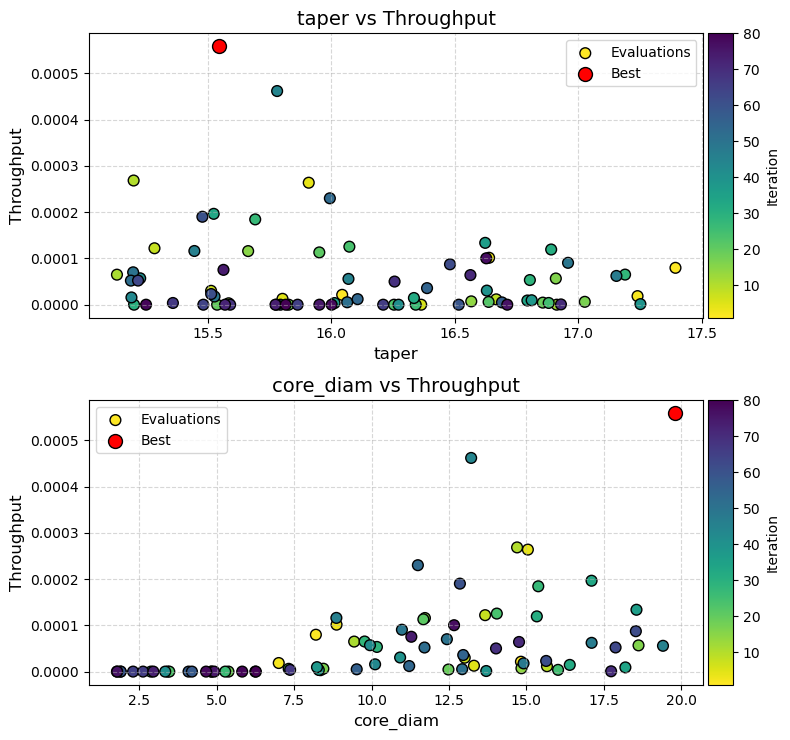

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("optimizer_results.csv")

param_names = list(custom_priors.keys())

plotting_optimizer_results(data, param_names)

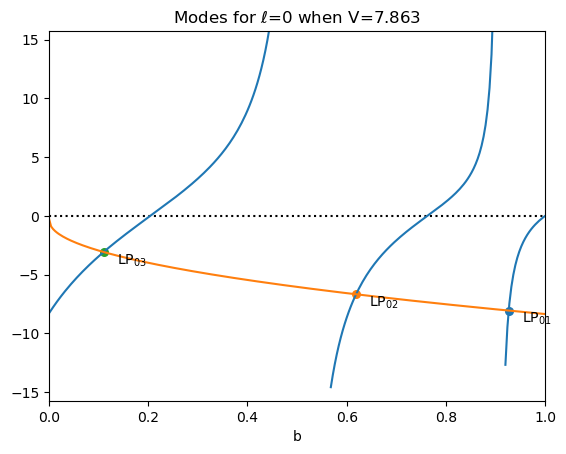

LP_01, b=0.9266
LP_02, b=0.6189
LP_03, b=0.1099
LP_11, b=0.8144
LP_12, b=0.3932
LP_21, b=0.6684
LP_22, b=0.1461
LP_31, b=0.4914
LP_41, b=0.2861
LP_51, b=0.0560


In [11]:
n_clad = RSoft_params["background_index"]
n_core = RSoft_params["background_index"] + fixed_params["cladding_delta"] # since we want a multimode diameter to support 7 modes
numerical_ap = ofiber.numerical_aperture(n_core, n_clad)

v_num = 2 * np.pi / (RSoft_params["free_space_wavelength"] * (variable_params["core_diam"]/2) * numerical_ap)
mode_l = 0
aplt = ofiber.plot_LP_modes(v_num, mode_l)
aplt.show()

for ell in range(6):
    all_b = ofiber.LP_mode_values(v_num,ell)
    for i,b in enumerate(all_b):
        print("LP_%d%d, b=%.4f"%(ell,i+1,b))

Monitoring LP01 in central core results:

1) 
taper: 15.108

core_diam: 14.983

Throughput: 0.986

2) 
taper: 16.608

core_diam: 19.682

Throughput: 0.995